# Task 06 - Logistic regression
## Pattern Recognition and Machine Learning

In [1]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook

from logreg import *
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#### load data

In [2]:
data = np.load("data_logreg.npz", allow_pickle=True)
tst = data["tst"].item()
trn = data["trn"].item()

## Classification of letters A and C
#### compute features

In [18]:
# prepare training data
train_X = np.array([np.ones(trn['images'].shape[2]),compute_measurements(trn['images'])[0]])
print(train_X.shape)

(2, 1800)


#### Training - gradient descent of the logistic loss function

In [111]:
# Start at a fixed point:
w_init = np.array([-7, -8,], dtype=np.float64)
# or start at a random point:
# w_init = 20 * (rand(size(train_X, 1), 1) - 0.5)
epsilon = 1e-2
[w, wt, Et] = logistic_loss_gradient_descent(train_X, trn['labels'], w_init, epsilon)
print(w, wt, Et)

[1.84110395 3.31719541] [[-7.         -6.61858178 -5.83224817 -4.14301871 -0.16658778  2.81740198
   1.30584304  2.28810828  1.94172635  2.06847868  1.91753489  1.95745064
   1.88307137  1.89862651  1.85984354  1.86708867  1.84632436  1.85016958
   1.83890385  1.84110395]
 [-8.         -7.30309949 -5.93434744 -3.32792094  1.1217637   3.09910677
   4.289988    3.57704634  3.70108142  3.49673472  3.51905328  3.42042137
   3.42208303  3.37070466  3.36924521  3.34178448  3.34062341  3.32580079
   3.32523391  3.31719541]] [8.37245948 7.74333922 6.50748341 4.14879597 0.46230407 0.31010964
 0.30137867 0.26199239 0.26007823 0.25893438 0.25846922 0.25820702
 0.2580731  0.2579988  0.25795926 0.25793765 0.2579261  0.25791984
 0.2579165  0.2579147 ]


#### Plot the progress of the gradient descent

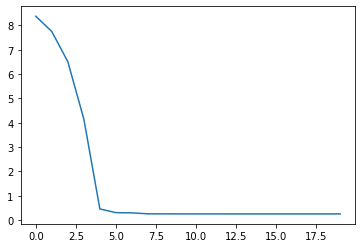

<Figure size 432x288 with 0 Axes>

In [112]:
plt.plot(Et )
plt.show()
plt.savefig('E_progress_AC.png')

c:\Users\Akande\Downloads\CVUT EECS\CVUT 3 AX WINTER 22 23\RPZ\ASSIGNMENTS\assignment_logreg_template\logreg.py:138: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolor(W1, W2, L, cmap='viridis', vmin=z_min, vmax=z_max, edgecolor='k')


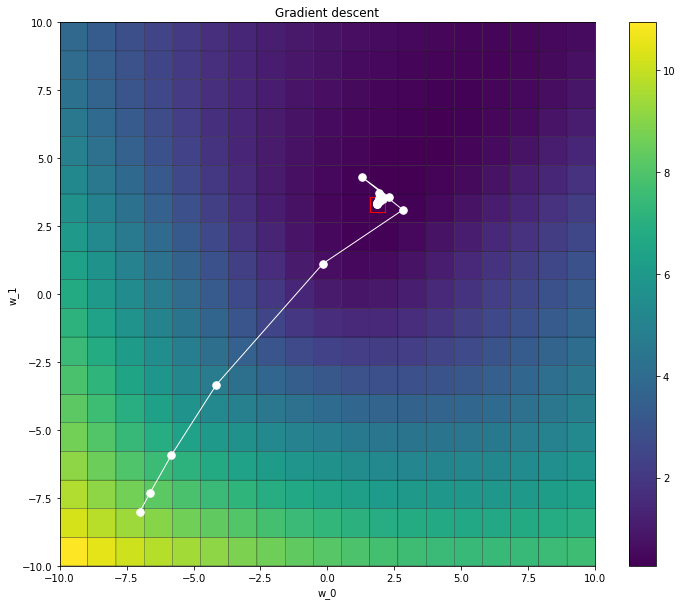

In [113]:
# you can change this:
plot_gradient_descent(train_X, trn['labels'], logistic_loss, w, wt, Et)
plt.savefig('w_progress_2d_AC.png')

In [114]:
# Load test letter data
testX = np.array([np.ones(tst['images'].shape[2]),compute_measurements(tst['images'])[0]])

# Classify letter test data and calculate classification error
classifiedLabels = classify_images(testX, w)
errors = classifiedLabels != tst['labels']
testError = np.sum(errors, dtype=np.float64) / errors.size
print('Letter classification error: {:.2f}%'.format(testError * 100))

Letter classification error: 6.50%


#### Visualize classification results

c:\Users\Akande\Downloads\CVUT EECS\CVUT 3 AX WINTER 22 23\RPZ\ASSIGNMENTS\assignment_logreg_template\logreg.py:173: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(plot_range, pCx, 'r-', LineWidth=2)
c:\Users\Akande\Downloads\CVUT EECS\CVUT 3 AX WINTER 22 23\RPZ\ASSIGNMENTS\assignment_logreg_template\logreg.py:174: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xA, np.zeros_like(xA), 'b+')


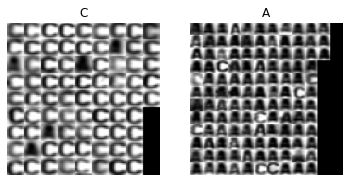

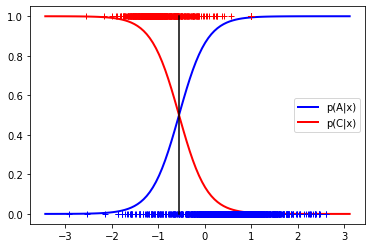

In [115]:
show_classification(tst['images'], classifiedLabels, 'CA')
plt.savefig('classif_AC.png')

# show the aposteriori probabilities
plot_aposteriori(train_X, trn['labels'], w)
plt.savefig('aposteriori.png')

## Classification of MNIST digits
#### init

In [119]:
# Load training data
data = np.load("mnist_trn.npz", allow_pickle=True)
X, y, imsize = data["X"], data["y"], data["imsize"]

[[-0.32393638 -0.3602438  -0.51706693 ... -0.43990041 -0.30043479
  -0.53139941]
 [-0.32393638 -0.3602438  -0.51706693 ... -0.43990041 -0.30043479
  -0.53139941]
 [-0.32393638 -0.3602438  -0.51706693 ... -0.43990041 -0.30043479
  -0.53139941]
 ...
 [-0.32393638 -0.3602438  -0.51706693 ... -0.43990041 -0.30043479
  -0.53139941]
 [-0.32393638 -0.3602438  -0.51706693 ... -0.43990041 -0.30043479
  -0.53139941]
 [-0.32393638 -0.3602438  -0.51706693 ... -0.43990041 -0.30043479
  -0.53139941]]


In [122]:
# Add x0 = 1 (for the bias term)
X = np.insert(X, 0, np.ones(X.shape[1]), axis=0)
# Training - gradient descent of the logistic loss function

np.random.seed(1) # to get the same example outputs
w_init = np.random.rand(X.shape[0])
epsilon = 1e-2

In [123]:
w, _, Et = logistic_loss_gradient_descent(X, y, w_init, epsilon)

#### visualise

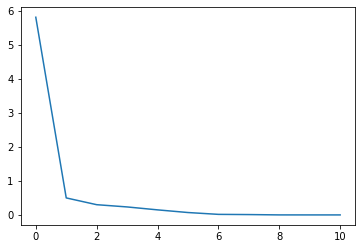

In [125]:
# Plot the progress of the gradient descent
plt.plot(Et)
plt.savefig('E_progress_MNIST.png')

## Classify MNIST test data and calculate classification error
#### init

In [126]:
# Load test data
data = np.load("mnist_tst.npz", allow_pickle=True)
X, y, imsize = data["X"], data["y"], data["imsize"]


X = np.insert(X, 0, np.ones(X.shape[1]), axis=0)

In [127]:
# Classify MNIST test data and calculate classification error
classifiedLabels = classify_images(X, w)
errors = np.abs(classifiedLabels - y) > 0
testError = np.sum(errors, dtype=np.float64) / errors.size
print('MNIST digit classification error: {:.2f}%'.format(testError * 100))

MNIST digit classification error: 0.10%


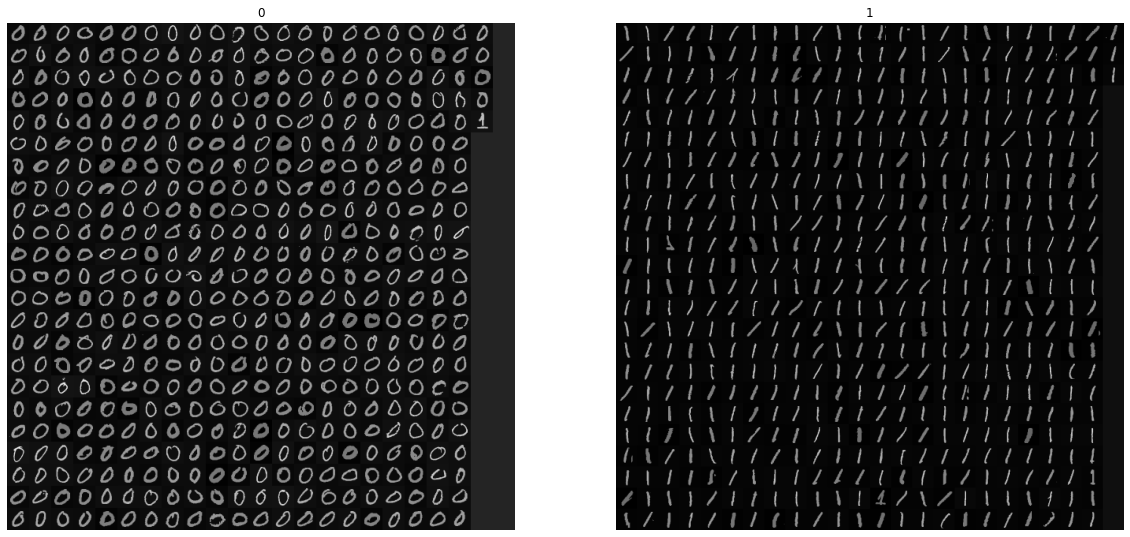

In [128]:
# Visualize classification results
show_mnist_classification(X[1:, :], classifiedLabels, imsize)
plt.savefig('classif_MNIST.png')

Because of our choice of image features, we now have a weight for each pixel (+ 1 bias term), allowing the following visualization. We can now intuitively explain how the decisions are made.

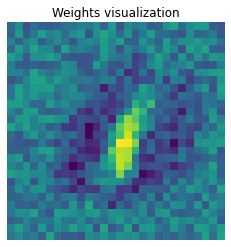

In [129]:
w_img = w[:-1].reshape(imsize)
plt.imshow(w_img)
plt.axis('off')
plt.title('Weights visualization')
plt.savefig('weight_image.png')